# Dog Breed App: Predicting Group type based on featureset
# Method : Decision Tree

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing AKC (American Kanine Corp) Dataset Encoded Data

In [2]:
# Loading data
file_path = Path("../sourcedata/akc_dog_breed_cln.csv")
dog_breed_val_df = pd.read_csv(file_path)
dog_breed_val_df.head()

,breed,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category,akc_breed,kaggle_breed,Img_Link,group_values
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,10,12,7,12,12,15,...,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing,affenpinscher,affenpinscher,https://www.akc.org/wp-content/uploads/2017/11...,0
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,25,27,50,60,12,15,...,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary,afghan_hound,afghan_hound,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,1
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,21,23,44,50,11,14,...,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly,airedale_terrier,airedale,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,2
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,24,28,70,130,10,13,...,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive,akita,NaN,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,3
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,23,25,75,85,10,14,...,0.8,Energetic,0.4,Independent,0.8,Friendly,alaskan_malamute,malamute,https://s3.amazonaws.com/cdn-origin-etr.akc.or...,3


In [3]:
dog_breed_val_df.columns

Index(['breed', 'description', 'temperament', 'popularity', 'min_height',
       'max_height', 'min_weight', 'max_weight', 'min_expectancy',
       'max_expectancy', 'group', 'grooming_frequency_value',
       'grooming_frequency_category', 'shedding_value', 'shedding_category',
       'energy_level_value', 'energy_level_category', 'trainability_value',
       'trainability_category', 'demeanor_value', 'demeanor_category',
       'akc_breed', 'kaggle_breed', 'Img_Link', 'group_values'],
      dtype='object')

In [4]:

# Define features set
col_to_drop = ['breed','group','description','grooming_frequency_category','shedding_category', 
                'energy_level_category', 'trainability_category', 'demeanor_category', 'temperament',
                'akc_breed', 'kaggle_breed', 'Img_Link']
X = dog_breed_val_df.copy()
X.drop(col_to_drop, axis=1, inplace=True)
X.head()




,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,group_values
0,148,10,12,7,12,12,15,0.6,0.6,0.6,0.8,1.0,0
1,113,25,27,50,60,12,15,0.8,0.2,0.8,0.2,0.2,1
2,60,21,23,44,50,11,14,0.6,0.4,0.6,1.0,0.8,2
3,47,24,28,70,130,10,13,0.8,0.6,0.8,1.0,0.6,3
4,58,23,25,75,85,10,14,0.6,0.6,0.8,0.4,0.8,3


In [5]:
# Check for negative values in the entire DataFrame
num_dog_breed_data_df = dog_breed_val_df.apply(pd.to_numeric, errors='ignore')
has_negatives = (num_dog_breed_data_df._get_numeric_data() < 0).any().any()

# If has_negatives is True, there are negative values; otherwise, there are no negative values
if has_negatives:
    print("The DataFrame contains negative values.")
else:
    print("The DataFrame does not contain negative values.")

The DataFrame does not contain negative values.


In [6]:
# Duplicating data
dog_breed_new_df = [dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df,dog_breed_val_df]
dog_breed_data_df = pd.concat(dog_breed_new_df)
dog_breed_data_df = dog_breed_data_df.sample(frac = 100,replace=True).reset_index(drop=True)
dog_breed_data_df.shape

(304700, 25)

In [7]:
# Define features set
# cat_col = ['grooming_frequency_category','shedding_category', 'energy_level_category', 'trainability_category', 'demeanor_category']
# val_col = ['grooming_frequency_value', 'shedding_value', 'energy_level_value', 'trainability_value', 'demeanor_value']

col_to_drop = ['breed','group','description','grooming_frequency_category','shedding_category',
                'energy_level_category', 'trainability_category', 'demeanor_category', 'temperament',
                'akc_breed', 'kaggle_breed', 'Img_Link']

X = dog_breed_data_df.copy()
X.drop(col_to_drop, axis=1, inplace=True)
X.head()

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,group_values
0,85,17,19,40,70,12,16,0.2,0.4,0.6,0.6,0.6,2
1,174,12,14,32,40,10,15,0.6,0.4,0.6,0.4,0.6,2
2,0,17,20,26,40,9,13,0.4,0.6,1.0,0.8,0.4,4
3,0,23,28,62,110,12,14,0.6,0.8,0.4,0.8,0.6,4
4,118,26,30,80,130,10,12,0.8,0.6,0.8,0.8,0.4,3


In [8]:

# Function to generate random float value between min_height and max_height
# Apply the function to all rows and assign to 'min_height' column
# Function to generate random float value between min_height and max_height
# Apply the function to all rows and assign to 'min_height' column
def generate_random_min_height(row):
    return np.random.uniform(row['min_height'], row['min_height']+(row['max_height']-row['min_height']) / 2)

def generate_random_max_height(row):
    return np.random.uniform(row['min_height']+(row['max_height']-row['min_height']) / 2,row['max_height'])

dog_breed_data_df['min_height'] = dog_breed_data_df.apply(generate_random_min_height, axis=1)
dog_breed_data_df['max_height'] = dog_breed_data_df.apply(generate_random_max_height, axis=1)


# Function to generate random float value between min_weight and max_weight
# Apply the function to all rows and assign to 'weight' column
def generate_random_min_weight(row):
    return np.random.uniform(row['min_weight'], row['min_weight']+ (row['max_weight']-row['min_weight']) / 2)

def generate_random_max_weight(row):
    return np.random.uniform(row['min_weight']+(row['max_weight']-row['min_weight']) / 2,row['max_weight'])

dog_breed_data_df['min_weight'] = dog_breed_data_df.apply(generate_random_min_weight, axis=1)
dog_breed_data_df['max_weight'] = dog_breed_data_df.apply(generate_random_max_weight, axis=1)

# Function to generate random float value between min_expectancy and max_expectancy
# Apply the function to all rows and assign to 'expectancy' column
def generate_random_min_expectancy(row):
    return np.random.uniform(row['min_expectancy'], row['min_expectancy']+(row['max_expectancy']-row['min_expectancy']) / 2)

def generate_random_max_expectancy(row):
    return np.random.uniform(row['min_expectancy']+(row['max_expectancy']-row['min_expectancy']) / 2,row['max_expectancy'])

dog_breed_data_df['min_expectancy'] = dog_breed_data_df.apply(generate_random_min_expectancy, axis=1)
dog_breed_data_df['max_expectancy'] = dog_breed_data_df.apply(generate_random_max_expectancy, axis=1)


In [9]:
# Check for negative values in the entire DataFrame
num1_dog_breed_data_df = dog_breed_data_df.apply(pd.to_numeric, errors='ignore')
has_negatives = (num1_dog_breed_data_df._get_numeric_data() < 0).any().any()

# If has_negatives is True, there are negative values; otherwise, there are no negative values
if has_negatives:
    print("The DataFrame contains negative values.")
else:
    print("The DataFrame does not contain negative values.")




The DataFrame does not contain negative values.


In [10]:
# Use label encoding to convert categorical values to numeric
breed_labels, breed_mappings = pd.factorize(dog_breed_data_df['breed'])

# Add the new numeric labels to the DataFrame
dog_breed_data_df['breed_values'] = breed_labels

# Print the DataFrame with the new numeric column
dog_breed_data_df[['breed_values','breed']]
# Define target vector
y = dog_breed_data_df["breed_values"].ravel()
y[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
dog_breed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304700 entries, 0 to 304699
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   breed                        304700 non-null  object 
 1   description                  304700 non-null  object 
 2   temperament                  304700 non-null  object 
 3   popularity                   304700 non-null  int64  
 4   min_height                   304700 non-null  float64
 5   max_height                   304700 non-null  float64
 6   min_weight                   304700 non-null  float64
 7   max_weight                   304700 non-null  float64
 8   min_expectancy               304700 non-null  float64
 9   max_expectancy               304700 non-null  float64
 10  group                        304700 non-null  object 
 11  grooming_frequency_value     304700 non-null  float64
 12  grooming_frequency_category  304700 non-null  object 
 13 

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [16]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()


In [17]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [18]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)



## Model Evaluation

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm)
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [20]:
# Show Confusion Matrix
cm

array([[310,   0,   0, ...,   0,   0,   0],
       [  0, 281,   0, ...,   0,   0,   0],
       [  0,   0, 274, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 275,   0,   0],
       [  0,   0,   0, ...,   0, 265,   0],
       [  0,   0,   0, ...,   0,   0, 293]], dtype=int64)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,274,275,276
0,310,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,281,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,274,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,293,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,279,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,219,0,0,0,0
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,276,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,275,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,265,0


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       281
           2       1.00      1.00      1.00       274
           3       1.00      1.00      1.00       293
           4       1.00      1.00      1.00       279
           5       1.00      1.00      1.00       279
           6       1.00      1.00      1.00       282
           7       1.00      1.00      1.00       270
           8       1.00      1.00      1.00       257
           9       1.00      1.00      1.00       296
          10       1.00      1.00      1.00       263
          11       1.00      1.00      1.00       281
          12       1.00      1.00      1.00       257
          13       1.00      1.00      1.00       267
          14       1.00      1.00      1.00       289
          15       1.00      1.00      1.00       284
          16       1.00      1.00     

In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = dt_model.feature_importances_
# We can sort the features by their importance
sorted(zip(dt_model.feature_importances_, X.columns), reverse=True)

[(0.13719043637391304, 'popularity'),
 (0.09033839430079836, 'max_height'),
 (0.0873888625111319, 'max_weight'),
 (0.08353856149666089, 'min_height'),
 (0.08025146103382258, 'min_expectancy'),
 (0.07982997373648011, 'shedding_value'),
 (0.0720640092638916, 'min_weight'),
 (0.06865254321792484, 'group_values'),
 (0.0650057963760522, 'demeanor_value'),
 (0.06237716068909602, 'energy_level_value'),
 (0.05803599727191735, 'trainability_value'),
 (0.0577430857780964, 'grooming_frequency_value'),
 (0.057583717950214816, 'max_expectancy')]

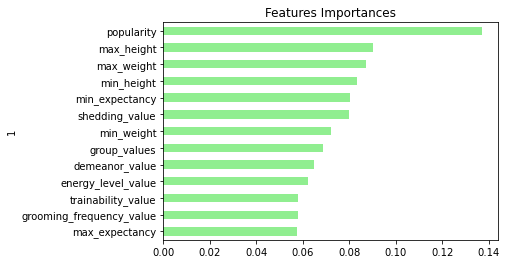

In [27]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(dt_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [22]:
# Extract the data from the Series and convert it to a numpy array
user_val = 10
user_input = []
user_input = X.iloc[user_val].values
# print(dog_breed_val_df[['breed','breed_values']].iloc[user_val])

# # Reshape the user_input to a 2-dimensional array
user_input_reshaped = user_input.reshape(1, -1)

# # Now user_input_reshaped is a 2D array
print((user_input_reshaped))

[[126.    9.   10.   11.   12.   12.   16.    0.4   0.6   0.6   0.6   0.8
    2. ]]


In [23]:
new_predictions = dt_model.predict(user_input_reshaped)
print(new_predictions)
print(y[new_predictions])

[94]
[82]


In [29]:
# Save Model Using Pickle

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

# save the model to disk
filename = 'dog_app_dt_breed_pred.sav'
pickle.dump(dt_model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

1.0
